<a href="https://colab.research.google.com/github/A01706648/TC3006C_Deliver/blob/main/m1/M1_Delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***General Questions:***

## ***By industry, what is the composition of US public firms in terms of firm size, sales performance and profitability?***

*  **SIZE:**  
   + WE SAHLL CONSIDER THE FIRM'S ***TOTAL_ASSERT - TOTAL_LIABILITIES*** FOR ITS **BOOK VALUE**  
 BUT SINCE MOST OF THE US FIRMS ARE IN A VERY HIGH LEVARAGE,  
 WE MAY ALSO USE FIRM'S **TOTAL_ASSERT** AS ITS REAL PHYSICAL SIZE   
   + THE **MARKET VALUE** CAN ALSO REPRESENT FIRM'S SIZE ON THE STOCK MARKET  
 IT WILL BE ***ORIGINAL_PRICE \* SHARE_OUTSTANDING***  

* **SALE PERFORMANCE:**  
 **RENENUE** INDICATE HOW MUCH SALE IT IS DONE, IT CAN PRESENT DITRECTLY ON HOW THE SALE IS GOING  
 WHILE CONSIDERING THE PROFIT, WE SHALL ALSO CONSIDER THE **OPERATING PROFIT MARGIN** AS THE REAL SALE PERFORMANCE,  
 BECAUSE IT IS THE PROFIT BEFORE TAX TO THE PER SALE, MEANS HOW PROFITABLE FOR THE SALE  

* **PROFITABILITY**  
 WE SHALL CONSIDER THE **PROFIT MARGIN** FOR THE PROFITABILITY FOR EACH FIRM IN PHYSICAL TERM.  
 IT IS ***NET_INCOME / REVENUE***, AND INDICATES FOR EACH SALE, HOW NET PROFITABLE IT IS FOR THE FIRM.  
 WE CAN ALSO CONSIDER THE PROFITABILITY ON THE ***STOCK MARKET***,  
 WE CAN ALSO CONSIDER ***ANNUAL RETURN OF STOCK***, AND ***EARNING PER SHARE***,  
 SINCE ANNUAL RETURN INDICATE THE MONEY INVESTOR WILL EARN FROM STOCK MARKET ON THAT FIRM,  
 AND EPS INDICATE THE MONEY FIRM PHYSICALLY EARNING, CAN BE SPREAD TO EACH SHARE,  
 THEN THE INVESTOR WILL BE ABLE TO SHARE THE EARNING WHICH THE FIRM MADE.

## ***WHY SOME FIRMS ARE MORE PROFITABLE THAN OTHERS?***  
 IF WE TALK ABOUT ***PROFIT MARGIN***,  
 SINCE SOME COMPANY'S PROFIT IS VERY LITTLE AMOUNT OF THEIR SALES, LIKE WALMART, THE RETAIL INDUSTRY.  
 AND SOME CONMPANY'S PROFIT IS VERY BIG STANDS A BIG PERCENTAGE OF THEIR SALE, LIKE GOOGLE, THE IT INDUSTRY.  
 BUT SOME COMPANY ALSO ***SELL*** A LOT WITH A LOW PROFIT MARGIN, AND SOME COMPANY CAN ***SELL*** VERY LITTLE WITH HIGH PROFIT MARGIN.  
 THOSE TWO FACTOR CAN AFFECT THE FINAL EARNING PER SHARE RESULT.  
 ALSO, THE ***LEVERAGE PERCENTAGE*** WILL AFFECT THE PROFITABLILITY ALSO.  
 THE COMPANY WITH HIGH LEVERAGE RATE, WILL NEED TO PAY MORE INTEREST AND PAYBACK THE DEBTS A LOT,  
 THAT WILL DECREASE THE NETINCOME.
 IF WE TALK ABOUT ***EARNING PER SHARE***  
 WE CAN CONSIDER IT DIRECTLY RELATED TO NETINCOME AND STOCK OUTSTANDING.  
 NET INCOME INDICATE HOW FIRMS PERFORM IN THE REAL WORLD.  
 IF WE CONSIDER ALL THE COMPANY PERFORM THE SAME IN REAL WORLD,  
 THEN MORE TAOCK OUTSTANDING ONE FIRM PUBLISH, THE LESS EARNING PER SHARE INVESTOR WILL GET.

## ***Which factors/variables from financial statements are related to stock returns?***  
**SHORT LEVERAGE PERCENTAGE, EARNING PER SHARE, PROFIT MARGIN AND BOOK-MARKET-RATIO** WILL ALL BE RELATED TO STOCK RETURN.  
ALSO WE SHALL CONSIDER THE **BOOK VALUE** OF THE COMPANY TOO.

In [262]:
isGoogleColab = False

if(isGoogleColab):
    from google.colab import drive
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [2]:
industry_dict = {'Accommodation and Food Services':'Services',
       'Administrative and Support and Waste Management and Remediation Services':'Services',
       'Agriculture, Forestry, Fishing and Hunting':'Agriculture',
       'Arts, Entertainment, and Recreation':'Services', 
       'Construction':'Construction',
       'Educational Services':'Services', 
       'Finance and Insurance':'Finance',
       'Health Care and Social Assistance':'Services', 
       'Information':'Services',
       'Manufacturing':'Manufacturing', 
       'Mining, Quarrying, and Oil and Gas Extraction':'Mining',
       'Other Services (except Public Administration)':'Services',
       'Professional, Scientific, and Technical Services':'Services',
       'Real Estate and Rental and Leasing':'Finance', 
       'Retail Trade':'Comercial',
       'Transportation and Warehousing':'Services', 
       'Utilities':'Energy', 
       'Wholesale Trade':'Comercial'}

In [3]:
if(isGoogleColab):
    drive.mount("/content/gdrive") 
    %cd "/content/gdrive/MyDrive/Machine Learning/deliver/M1"
df = pd.read_csv('us2022q2a.csv')
df_firm = pd.read_csv('usfirms2022.csv')

In [ ]:
bIsAproachNew = False

df_more = df.copy()

#put industry column
firm_list = df['firm'].unique()
firm_list = firm_list.tolist()
firm_list.remove(np.nan)
df_firm_more = df_firm.copy()
df_firm_more['industry'] = df_firm_more['Sector NAICS\nlevel 1']
df_firm_more = df_firm_more.replace({'industry': industry_dict})

firm_industry_dic = {}

if(bIsAproachNew):
  firm_industry_dic_temp = {}

  for count in range(df_firm_more['Ticker'].count()):
    firm_industry_dic_temp[df_firm_more['Ticker'][count]] = df_firm_more['industry'][count]

  #print(firm_industry_dic_temp)
else:
  for firm in firm_list:
    if (len((df_firm_more[df_firm_more['Ticker'] == firm]['industry']).values.tolist()) > 0):
      firm_industry_dic[firm] = ((df_firm_more[df_firm_more['Ticker'] == firm]['industry']).values.tolist())[0]
    else:
      firm_industry_dic[firm] = np.nan

for firm in firm_list:
    if(bIsAproachNew):
      if((len(firm) > 0) and (firm in firm_industry_dic_temp)):
        firm_industry_dic[firm] = firm_industry_dic_temp[firm]
      #else:
      #  firm_industry_dic[firm] = np.nan
    else:
      if(len(firm) > 0):
        #firm_industry_dic[firm] = ((df_firm_more[df_firm_more['Ticker'] == firm]['industry']).values.tolist())[0]
        temp_df = df_firm_more[df_firm_more['Ticker'] == firm]
        if(temp_df['industry'].count() > 0):
          firm_industry_dic[firm] = temp_df['industry'].tolist()[0]
      #else:
      #  firm_industry_dic[firm] = np.nan

df_more['industry'] = df_more['firm']
df_more = df_more.replace({'industry': firm_industry_dic})


#put country column
firm_country_dict = {}
for count in range(df_firm['Ticker'].count()):
    firm = df_firm['Ticker'][count]
    country = df_firm['Country\nof Origin'][count]
    firm_country_dict[firm] = country

df_more['country'] = df_more['firm']
df_more = df_more.replace({'country':firm_country_dict})
df_more = df_more.dropna(how='all')
#df_more

In [5]:


#Calculate bookvalue
df_more['bookvalue'] = df_more['totalassets'] - df_more['totalliabilities']

#Calculate Market Value
df_more['marketvalue'] = df_more['originalprice'] * df_more['sharesoutstanding']

#Calculate Operating profit margin
df_more['op_profit'] = df_more['revenue'] - df_more['cogs'] - df_more['sgae'] - df_more['otheropexp']
df_more['op_profit_margin'] = df_more['op_profit'] / df_more['revenue']
df_more['net_income'] = df_more['op_profit'] - df_more['incometax'] - df_more['finexp'] + df_more['extraincome']
df_more['profit_margin'] = df_more['net_income'] / df_more['revenue']

#Calculate CC Return
df_more['anual_cc_return'] = np.log(df_more['adjprice']) - np.log(df_more['adjprice'].shift(4))

#add Date
df_more['date'] = pd.to_datetime(df_more['q'])

#Earning Per Share
df_more['eps'] = df_more['net_income'] / df_more['sharesoutstanding']

#Calculate the short term leverage

#Calculate the ratio of bookvalue and market value


In [ ]:
#df_more.head()

In [ ]:
industry_list = df_more['industry'].unique()
industry_list = industry_list.tolist()
del industry_list[-1]
del industry_list[-1]
#industry_list

# ***Specific questions:***  
## ***About descriptive statistics:***
### ***Considering the most recent financial quarter of the dataset:***

#### ***Show how many firms by industry there are in the sample***  
IT IS SHOWN IN THE TABLE BELOW

In [8]:
#Show how many firms by industry there are in the sample
industry_firm_num = []
for industry in industry_list:
  industry_firm_num.append(len(df_more[df_more['industry'] == industry]['firm'].unique()))

df_industry_firm_num = pd.DataFrame({'Industry':industry_list,'firm num':industry_firm_num})
df_industry_firm_num

,Industry,firm num
0,Manufacturing,1565
1,Finance,769
2,Services,792
3,Comercial,231
4,Energy,77
5,Construction,45
6,Agriculture,16
7,Mining,103


#### ***For each industry (and for all industries),***  
#### ***what can you say about the typical firm size in terms of market value and book value?***

WE ANALYZED THE LAST QUATER OF THE ***MARKET VALUE*** AND ***BOOK VALUE*** OF ALL THE FIRMS FOR EACH INDUSTRY,  
FROM THE BOXPLOT, WE CAN SEE THE BOOK VALUE OF FIRMS ARE ***VERY DISPERSIVE***,  
FOR BOOK VALUE, STANDARD ERROR IS 11.6 BILLION, BUT 50% OF THE FIRMS ARE BETWEEN 74 MILLION TO 1.6 BILLION  
FOR MARKET VALUE, STANDARD ERROR IS 74 BILLION, BUT 50% OF THE FIRMS ARE BETWEEN 180 MILLION TO 5 BILLION  
SO WE ARE GOING TO USE THE ***MEDIAN VALUE*** OF THE ***MARKET VALUE*** AND ***BOOK VALUE***,  
TO INDICATE THE TYPICAL FIRM SIZE OF EACH INDUSTRY


THE TYPICAL FIRM SIZE OF EACH INDUSTRY IS SHOWN BELOW

In [9]:
df_final_size = df_more.dropna()
df_final_size = df_final_size.groupby('firm').last()
#df_final_size

In [10]:
df_final_size.groupby('industry').median()[['bookvalue', 'marketvalue']]

,bookvalue,marketvalue
industry,,
Agriculture,1068506.5,1.264045e+06
Comercial,679144.0,1.487280e+06
Construction,998146.5,1.900822e+06
Energy,2914350.5,6.355661e+06
Finance,1038181.0,1.785152e+06
Manufacturing,246405.0,6.529413e+05
Mining,693059.0,1.056557e+06
Services,457566.0,1.956561e+06


THE TYPICAL FIRM SIZE OF EACH INDUSTRY IS SHOWN BELOW  
TYPICAL BOOK VALUE IS ***401 MILLION***  
TYPICAL MARKET VALUE IS ***1.17 BILLION***

In [243]:
df_final_size[['bookvalue', 'marketvalue']].median()

bookvalue      4.014335e+05
marketvalue    1.174999e+06
dtype: float64

#### ***How much these variables change within each industry?***  
***MANUFACTURING***  
***BOOK VALUE***  
50% OF THE FIRMS ARE BETWEEN 48 MILLION TO 1.0 BILLION,  
MEDIAN IS 246 MILLION  
MAX IS 184 BILLION  
MIN IS -14.8 BILLION  
***SERVICE***  
***BOOK VALUE***  
50% OF THE FIRMS ARE BETWEEN 93.5 MILLION TO 1.66 BILLION,  
MEDIAN IS 457 MILLION  
MAX IS 255 BILLION  
MIN IS -8 BILLION  
***COMERCIAL***  
***BOOK VALUE***  
50% OF THE FIRMS ARE BETWEEN 168 MILLION TO 1.76 BILLION,  
MEDIAN IS 679 MILLION  
MAX IS 131 BILLION  
MIN IS -6.9 BILLION  
***FINANCE***  
***BOOK VALUE***  
50% OF THE FIRMS ARE BETWEEN 215 MILLION TO 3.2 BILLION,  
MEDIAN IS 1.0 BILLION  
MAX IS 76.2 BILLION  
MIN IS -5.4 BILLION  
***ENERGY***  
***BOOK VALUE***  
50% OF THE FIRMS ARE BETWEEN 1.0 BILLION TO 10.0 BILLION,  
MEDIAN IS 2.9 BILLION  
MAX IS 51.6 BILLION  
MIN IS -1.2 BILLION  
***CONSTRAUCTION***  
***BOOK VALUE***  
50% OF THE FIRMS ARE BETWEEN 409.8 MILLION TO 2.7 BILLION,  
MEDIAN IS 1.0 BILLION  
MAX IS 21.8 BILLION  
MIN IS 83.1 MILLION  
***AGRICULTURE***  
***BOOK VALUE***  
50% OF THE FIRMS ARE BETWEEN 202 MILLION TO 3.3 BILLION,  
MEDIAN IS 1.1 BILLION  
MAX IS 26.1 BILLION  
MIN IS 14.8 MILLION  
***MINING***  
***BOOK VALUE***  
50% OF THE FIRMS ARE BETWEEN 117.7 MILLION TO 2.86 BILLION,  
MEDIAN IS 693 MILLION  
MAX IS 27.8 BILLION  
MIN IS -124 MILLION  

In [12]:
px.box(df_final_size, x='industry', y='bookvalue', title='Book Value of all industries')

In [13]:
px.box(df_final_size, x='industry', y='marketvalue', title='Market Value of all industries')

#### ***How firm size (in market value) is distributed?***  
FOR MARKET VALUE,  
STANDARD ERROR IS 74 BILLION,  
BUT 50% OF THE FIRMS ARE BETWEEN 180 MILLION TO 5 BILLION  
MEDIAN IS 1.175 BILLION  
MAX IS 2.2 TRILLION  
MIN IS 35 THOUSAND

In [246]:
px.box(df_final_size, y='marketvalue', title='Market Value Distribution')

In [ ]:
df_final_size['marketvalue'].describe()

count    2.792000e+03
mean     1.250613e+07
std      7.397673e+07
min      3.490000e+01
25%      1.796944e+05
50%      1.174999e+06
75%      5.024743e+06
max      2.212838e+09
Name: marketvalue, dtype: float64

In [ ]:
df_final_size['bookvalue'].describe()

count    2.792000e+03
mean     2.951381e+06
std      1.157892e+07
min     -1.479100e+07
25%      7.414621e+04
50%      4.014335e+05
75%      1.582302e+06
max      2.554190e+08
Name: bookvalue, dtype: float64

#### ***For each industry (and for all industries),***  
#### ***what can you say about profit margin of firms?***  
THE PROFIT MARGIN IS THE NET INCOMRE DIVIDED BY REVENUE,  
IT INDICATE HOW PROFITABLE IS THE SALE

##### ***a) descriptive statistics of profit margin and for the profit margin for the last quater of all industry***  
IT IS SHOWN IN THE TABLE BELOW

In [248]:
desc_dict = {'count':[], 'mean':[], 'std':[], 'min':[], '25%':[], '50%':[], '75%':[], 'max':[]}

df_final_size.replace([np.inf, -np.inf], np.nan, inplace=True)
df_final_size.dropna(subset=['profit_margin'])

for industry in industry_list:
    description = df_final_size[df_final_size['industry'] == industry]['profit_margin'].describe()
    for key in list(desc_dict.keys()):
        desc_dict[key].append(description[key])
    #desc_list.append(description)
    #print(industry)
    #print(description)
    #print('\n')

df_profit_margin = pd.DataFrame(desc_dict, index = industry_list)
df_profit_margin

,count,mean,std,min,25%,50%,75%,max
Manufacturing,1223.0,-18.590992,139.421238,-2702.514286,-0.609702,0.017637,0.099516,123.970175
Finance,173.0,-1.054628,10.211508,-130.500000,-0.016331,0.083146,0.186623,1.120822
Services,716.0,-1.076254,12.230255,-291.714734,-0.148159,0.018189,0.094784,5.395082
Comercial,220.0,-0.000819,0.302966,-2.549859,0.006695,0.037644,0.074067,1.014139
Energy,75.0,-0.371223,3.528162,-29.637838,0.047933,0.090954,0.156109,1.548913
Construction,44.0,0.071604,0.121165,-0.438356,0.022316,0.076800,0.134525,0.385378
Agriculture,16.0,-0.046275,0.286728,-0.979005,-0.035681,0.025442,0.106148,0.185485
Mining,96.0,0.117230,3.550048,-18.578947,0.017343,0.222677,0.385259,26.769638


##### ***b) plot(s) to illustrate how profit margin changes across industries.***  
IT IS SHOWN IN THE BOXPLOT BELOW

In [249]:
px.box(df_final_size, x='industry', y='profit_margin', title='Profit Margin of all industries')

#### ***Which are the biggest 10 US firms in terms of market value***

THE BIGGEST US FIRMS FOR EACH INDUSTRY

In [16]:
industry_top10_marketvalue_dic = {}
df_final_size_us = df_final_size[df_final_size['country'] == 'US']

for industry in industry_list:
  df_temp = df_final_size_us[df_final_size_us['industry'] == industry].sort_values(['marketvalue'],ascending=False)[['marketvalue']].head(10)
  industry_top10_marketvalue_dic[industry] = {}
  industry_top10_marketvalue_dic[industry]['firm'] = df_temp.index.tolist()
  industry_top10_marketvalue_dic[industry]['marketvalue'] = df_temp['marketvalue'].tolist()

top10_marketvalue_data = {}
for industry in industry_list:
  for attribute in ['firm', 'marketvalue']:
    top10_marketvalue_data[industry + '_' + attribute] = industry_top10_marketvalue_dic[industry][attribute]

firm_marketvalue_median_us = df_final_size_us['marketvalue'].median()

df_top10_marketvalue = pd.DataFrame(top10_marketvalue_data)
df_top10_marketvalue

,Manufacturing_firm,Manufacturing_marketvalue,Finance_firm,Finance_marketvalue,Services_firm,Services_marketvalue,Comercial_firm,Comercial_marketvalue,Energy_firm,Energy_marketvalue,Construction_firm,Construction_marketvalue,Agriculture_firm,Agriculture_marketvalue,Mining_firm,Mining_marketvalue
0,AAPL,2.212838e+09,UNH,4.818731e+08,MSFT,1.920840e+09,AMZN,1.080624e+09,NEE,1.521918e+08,DHI,2.330088e+07,GIS,4.505560e+07,EOG,6.468620e+07
1,TSLA,6.976698e+08,AMT,1.166213e+08,GOOGL,1.435042e+09,WMT,3.332690e+08,DUK,8.254103e+07,LEN,2.056314e+07,CTVA,3.918112e+07,OXY,5.484625e+07
2,JNJ,4.671001e+08,ELV,1.163427e+08,META,4.363946e+08,HD,2.818823e+08,D,6.474749e+07,PWR,1.801249e+07,K,2.410383e+07,PXD,5.397621e+07
3,NVDA,3.789750e+08,BLK,9.227154e+07,V,3.743426e+08,COST,2.123033e+08,SO,6.406955e+07,J,1.635238e+07,INGR,5.837918e+06,SLB,5.057852e+07
4,XOM,3.569164e+08,CI,8.360790e+07,MA,3.068500e+08,CVS,1.215059e+08,AEP,4.926943e+07,NVR,1.317228e+07,POST,5.002324e+06,NEM,4.735716e+07
5,PG,3.449949e+08,MMC,7.792211e+07,VZ,2.131355e+08,LOW,1.116366e+08,SRE,4.723057e+07,PHM,9.417149e+06,CALM,2.418139e+06,FCX,4.240542e+07
6,LLY,3.080702e+08,NFLX,7.776567e+07,ORCL,1.861984e+08,TGT,6.548784e+07,EXC,4.443501e+07,KBR,6.753310e+06,FRPT,2.256704e+06,SCCO,3.850762e+07
7,PFE,2.941793e+08,CME,7.357354e+07,MCD,1.816339e+08,TJX,6.543587e+07,XEL,3.853967e+07,BLD,5.479154e+06,FDP,1.412091e+06,DVN,3.637260e+07
8,CVX,2.833974e+08,CCI,7.291387e+07,CMCSA,1.731755e+08,SHW,5.803368e+07,LNG,3.380812e+07,MTZ,5.438982e+06,BV,1.116000e+06,HAL,2.828596e+07
9,KO,2.727167e+08,BX,6.148956e+07,DIS,1.719481e+08,DG,5.571415e+07,ED,3.369345e+07,EME,5.265575e+06,AVO,1.006846e+06,CLR,2.372003e+07


<AxesSubplot:xlabel='industry', ylabel='marketvalue'>

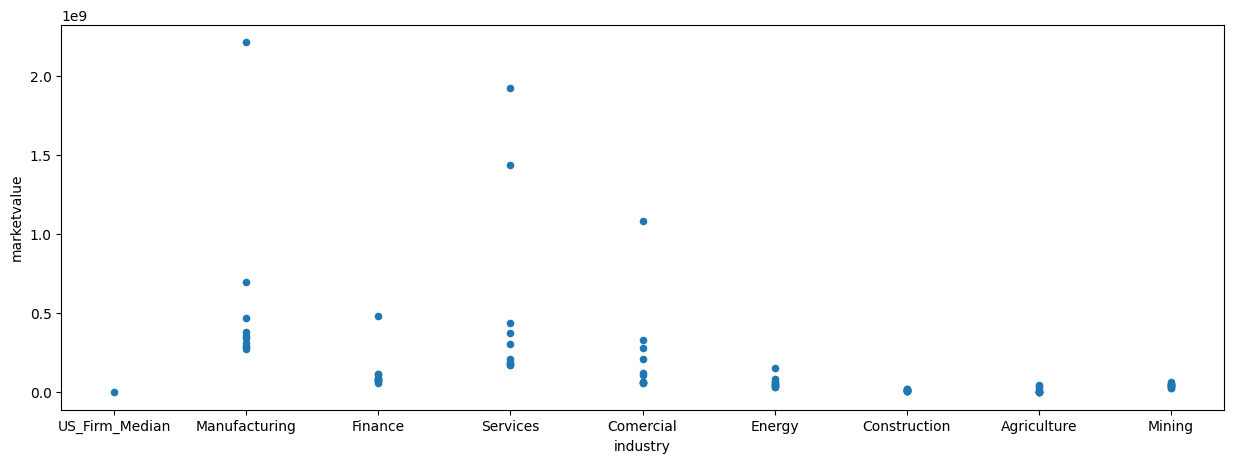

In [250]:
df_top10_marketvalue_2d_dict = {'firm':['mean'], 'marketvalue':[firm_marketvalue_median_us], 'industry':['US_Firm_Median']}
for industry in industry_list:
    df_top10_marketvalue_2d_dict['firm'].extend(industry_top10_marketvalue_dic[industry]['firm'])
    df_top10_marketvalue_2d_dict['marketvalue'].extend(industry_top10_marketvalue_dic[industry]['marketvalue'])
    
    for count in range(len(industry_top10_marketvalue_dic[industry]['firm'])):
        df_top10_marketvalue_2d_dict['industry'].append(industry)

df_top10_marketvalue_2d = pd.DataFrame(df_top10_marketvalue_2d_dict)
df_top10_marketvalue_2d.plot('industry', 'marketvalue', kind ='scatter', figsize=(15,5))

#### ***Which are the biggest 10 US firms in terms of market value***
THE BIGGEST FIRM OF ALL US INDUSTRY  
AND THE LAST IS THE MEDIAN OF US FIRM'S MARKET VALUE

In [17]:
df_temp = df_final_size_us.sort_values(['marketvalue'],ascending=False)[['marketvalue']].head(10)
df_temp = df_temp.reset_index()
df_temp = df_temp.copy()
df_temp.loc[10] = ['Us_Firm_Median', firm_marketvalue_median_us]
df_temp

,firm,marketvalue
0,AAPL,2.212838e+09
1,MSFT,1.920840e+09
2,GOOGL,1.435042e+09
3,AMZN,1.080624e+09
4,TSLA,6.976698e+08
5,UNH,4.818731e+08
6,JNJ,4.671001e+08
7,META,4.363946e+08
8,NVDA,3.789750e+08
9,V,3.743426e+08


#### ***and how far they are from the typical size of a US firm?***
THE SCATTER CHART SHOWING HOW THE 10 BIGGEST US FIRMS  
COMPARE TO HOW FAR FROM THE TYPICAL US FIRM

<AxesSubplot:xlabel='firm', ylabel='marketvalue'>

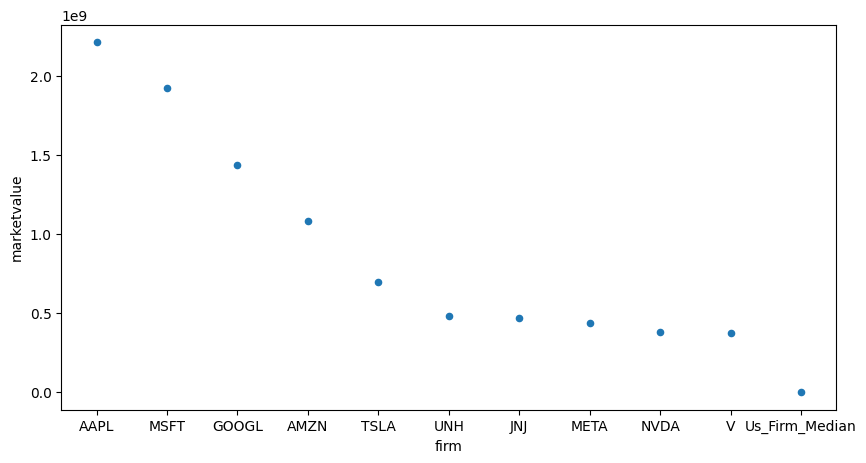

In [18]:
#insert the median of us firm
df_temp.plot('firm', 'marketvalue', kind ='scatter', figsize=(10,5))

#### ***Which are the biggest 10 US firms in terms of book value?***

In [251]:
firm_bookvalue_median_us = df_final_size_us['bookvalue'].median()

df_temp1 = df_final_size_us.sort_values(['bookvalue'],ascending=False)[['bookvalue']].head(10)
df_temp1 = df_temp1.reset_index()
df_temp1 = df_temp1.copy()
df_temp1.loc[10] = ['Us_Firm_Median', firm_bookvalue_median_us]
df_temp1

,firm,bookvalue
0,GOOGL,255419000.0
1,XOM,184508000.0
2,MSFT,166542000.0
3,CVX,154562000.0
4,T,135307000.0
5,AMZN,131402000.0
6,META,125767000.0
7,INTC,101218000.0
8,DIS,96433000.0
9,CMCSA,92559000.0


#### ***and how far they are from the typical size of a US firm?***  
THE SCATTER CHART SHOWING HOW THE 10 BIGGEST US FIRMS  
COMPARE TO HOW FAR FROM THE TYPICAL US FIRM

<AxesSubplot:xlabel='firm', ylabel='bookvalue'>

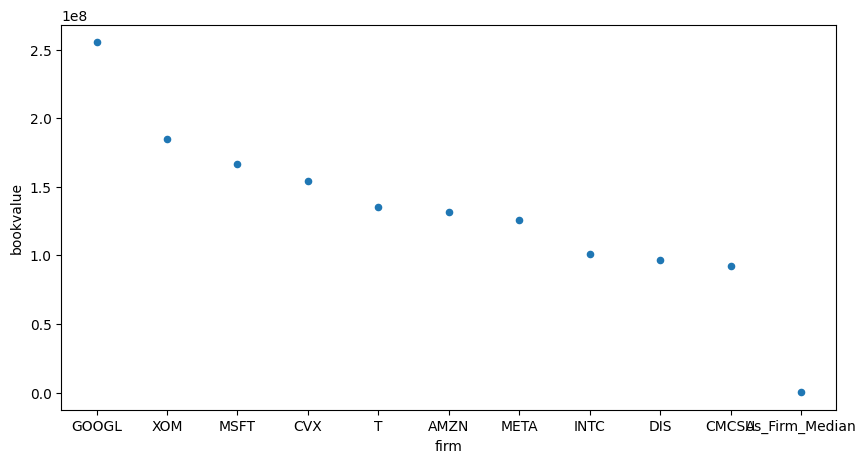

In [253]:
df_temp1.plot('firm', 'bookvalue', kind ='scatter', figsize=(10,5))

## ***Considering the whole history of financial data for all firms:***
### ***among firms of different sizes***

WE CHECK THE STATICS OF DIFFERENT SIZE OF FIRM (BASED ON MARKET VALUE)

In [20]:
df_final_size['marketvalue'].describe()

count    2.792000e+03
mean     1.250613e+07
std      7.397673e+07
min      3.490000e+01
25%      1.796944e+05
50%      1.174999e+06
75%      5.024743e+06
max      2.212838e+09
Name: marketvalue, dtype: float64

AFTER WINZORIZATION,  
WE GIVE A HISTOGRAM TO SHOW HOW THE DISTRIBUTION OF THE FIRM SIZE OF ALL FIRMS

count    2.369000e+03
mean     1.869005e+06
std      2.531450e+06
min      3.490000e+01
25%      1.299805e+05
50%      7.344904e+05
75%      2.678215e+06
max      1.219609e+07
Name: marketvalue, dtype: float64

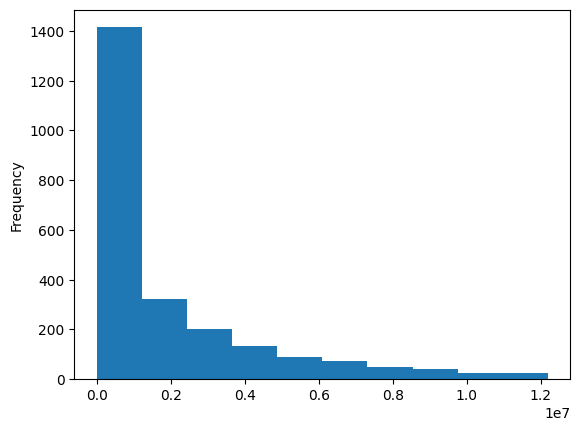

In [21]:
#shall the histrograph of all firm's size
#df_final_size['marketvalue'].plot(kind ='hist')
marketvalue_describe = df_final_size['marketvalue'].describe()
marketvalue_1q = marketvalue_describe['25%']
marketvalue_3q = marketvalue_describe['75%']
marketvalue_iqr = marketvalue_3q - marketvalue_1q
marketvalue_range_low = marketvalue_1q - (1.5 * marketvalue_iqr)
marketvalue_range_high = marketvalue_3q + (1.5 * marketvalue_iqr)
df_final_size_no_outlier = df_final_size[(df_final_size['marketvalue'] >= marketvalue_range_low) & (df_final_size['marketvalue'] <= marketvalue_range_high)]
df_final_size_no_outlier['marketvalue'].plot(kind ='hist')

df_final_size_no_outlier['marketvalue'].describe()

AFTER REMOVE THE OUTLIER, FOR THE MARKET VALUE  
25% FIRM IS BELOW 124 MILLION,  
25% FIRM IS BETWEEN 664 MILLION AND 124 MILLION,  
25% FRIM IS BETWEEN 2.5 BILLION AND 664 MILLION,  
25% FIRM IS ABOVE 2.5 BILLION


### ***1, How can you measure firm profitability that can be used to compare performance***
### ***Select and justify at least 3 measures***
I CHOOSE  
***OPERATING PROFIT MARGIN*** : IT INDICATE HOW GOOD THE FIRM IS DOING ON SALE FOR PROFIT  
***ANNUAL RETURN*** : IT INDICATE HOW GOOD THE FIRM IS PERFORM ON STOCK MARKET FOR PROFIT  
***EARNING PER SHARE*** : IT INDICATE HOW THE NET INCOME REFECT ON THE STOCK MARKET  

I COMPARE THE MEDIAN OF THOSE VARIABLE BETWEEM FIRMS,  
AND CHECK THE TIME LINE OF HOW THEY CHANGE,  
I NOTICE THAT THEY ARE ALL CORRELATED WITH EACH OTHER,  
THEY ALL SHOWING THE PROFITABLITY OF ONE FIRM

In [257]:
from tkinter.ttk import Style

df_more.replace([np.inf, -np.inf], np.nan, inplace=True)

df_more_groupby_date = df_more.dropna(subset=['op_profit_margin', 'anual_cc_return', 'eps']).groupby('date')

df_op_profit_margin = df_more_groupby_date['op_profit_margin'].median()
df_annual_return = df_more_groupby_date['anual_cc_return'].median()
df_eps = df_more_groupby_date['eps'].median()

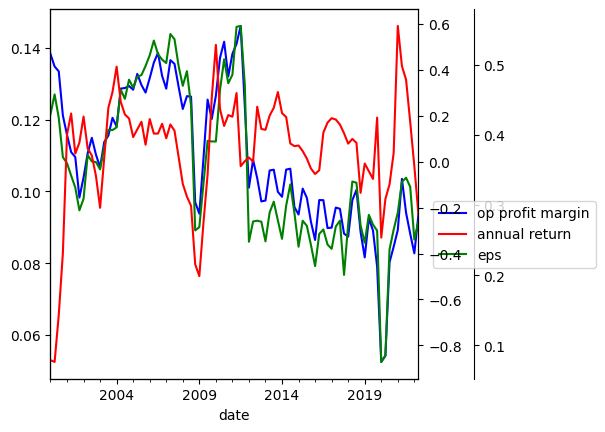

In [258]:
fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

df_op_profit_margin.plot(ax=ax, style='b-')
df_annual_return.plot(ax=ax, style='r-', secondary_y=True)
df_eps.plot(ax=ax3, style='g-')

ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
           ['op profit margin','annual return','eps'], bbox_to_anchor=(1.5, 0.5))

### ***and show descriptive statistics***

In [ ]:
df_more_clean = df_more.dropna(subset=['op_profit_margin', 'anual_cc_return', 'eps'])
df_more_clean['op_profit_margin'] = winsorize(df_more_clean['op_profit_margin'], limits=[0.01,0.01])
df_more_clean['anual_cc_return'] = winsorize(df_more_clean['anual_cc_return'], limits=[0.01,0.01])
df_more_clean['eps'] = winsorize(df_more_clean['eps'], limits=[0.01,0.01])

FOR THE DESCRIPTIVE STATISTICS FOR THOSE VARIABLE  
FROM ALL THE TIME AND ALL THE FIRM   
AFTER WINSORIZATION

***OP PROFIT MARGIN***  
50% IS BETWEEN 1.9% TO 23%  
MEDIAN IS 10.2%

In [265]:
df_more_clean['op_profit_margin'].describe()

count    139482.000000
mean         -0.697520
std           5.287120
min         -45.284553
25%           0.019230
50%           0.102650
75%           0.232323
max           0.952967
Name: op_profit_margin, dtype: float64

***ANNUAL STOCK RETURN***  
50% IS BETWEEN -15% TO 29.5%  
MEDIAN IS 9.1%

In [266]:
df_more_clean['anual_cc_return'].describe()

count    139482.000000
mean          0.041519
std           0.491001
min          -1.847110
25%          -0.151633
50%           0.090731
75%           0.295173
max           1.383992
Name: anual_cc_return, dtype: float64

***EARNING PER SHARE***  
50% IS BETWEEN 0.0004 USD TO 0.73 USD  
MEDIAN IS 0.32USD

In [267]:
df_more_clean['eps'].describe()

count    139482.000000
mean          0.457177
std           1.009910
min          -2.636425
25%           0.000469
50%           0.318485
75%           0.730859
max           5.607978
Name: eps, dtype: float64

#### ***Calculate and explain earnings per share deflated by price***  
EPS = NET_INCOME / STOCK_OUTSTANDING  
EPSP = EPS / Original_Price  
IT MEANS, HOW MUCH NETINCOME WILL BE SHARED BY INVESTOR, BY EACH MONEY THE INVESTOR PAY FOR STOCK,  
WHEN EPSP IS HIGH, MEANS INVESTOR WILL GET MORE NETINCOME IF THEY PAY THE SAME MONEY TO BUY FIRM'S STOCK,  
IT CAN BE A INVESTMENT RETURN RATIO TO THE INVESTOR.

In [125]:
df_more['epsp'] = df_more['eps'] / df_more['originalprice']

# ***About statistical modeling***

## ***For Financial services***

## ***Select at least 3 factors and briefly explain why you think might be related to stock returns***

I THINK THE  
***OPERATING_PROFIT_MARGIN***,  
***SHORT_TERM_LEVERAGE*** AND  
***BOOK_MARKET_VALUE_RATIO***  
MAY BE RELATED TO THE ANNUAL STOCK RETURN OF ONE QUARTER IN THE FUTURE.

THE REASON IS THAT  
 **OPERATING_PROFIT_MARGIN** REFLECT HOW GOOD A FIRM IS RUNNING BASED ON ITS PROFITABLE BEHAVIOR,  
 **SHORT_TERM_LEVERAGE** REFLECT A URENT PAY NEED TO BE DONE WITHIN ONE YEAR, AND ANNUAL RETURN IS WITHIN ONE YEAR'S MARKET RETURN, SO THE SHORT_TERM_LEVERAGE WILL AFFECT THE PROFIT OF ONE FIRM WITHIN ONE YEAR  
 **BOOK_MARKET_RATIO** INDICATE THE RATIO BETWEEN THE BOOK VALUE AND MARKET VALUE, AND THE PERFORMANCE OF THE FIRM WILL AFFECT THE BOOK VALUE, WITH THE BOK_MARKET_RATIO, THE BOOK VALUE WILL AFFECT TO MARKET VALUE, AND THE CHANGE OF MARKET VALUE WILL AFFECT THE ANNUAL STOCK RETURN


In [126]:
df_finance = df_more[df_more['industry'] == 'Finance'].copy()
df_finance['short_leverage'] = df_finance['shortdebt'] / df_finance['totalassets']
df_finance['bmr'] = df_finance['bookvalue'] / df_finance['marketvalue']

df_finance.replace([np.inf, -np.inf], np.nan, inplace=True)

## ***Do histograms for each factor/variables and interpret them***  

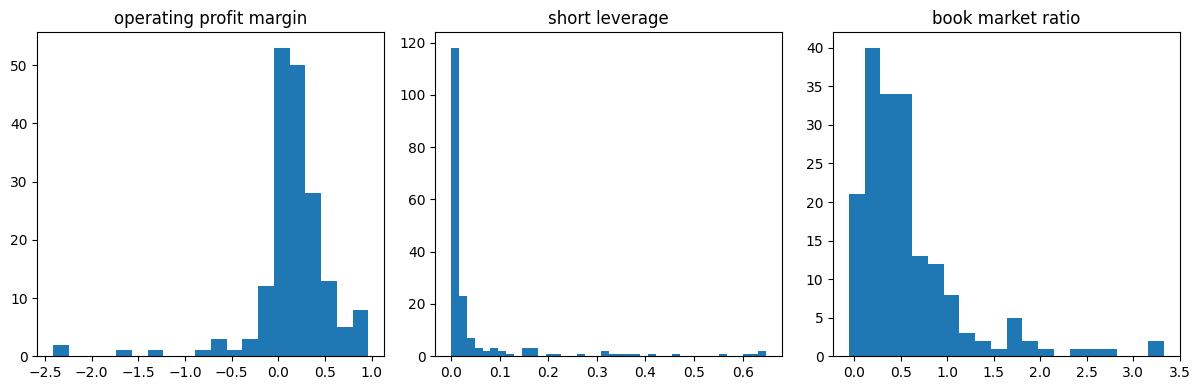

In [122]:
#Do histograms for each factor/variables and interpret them
df_finance_win = df_finance.copy()
fig, axs = plt.subplots(1, 3, figsize=(12,4))

df_finance_win = df_finance_win.dropna(subset=['op_profit_margin', 'short_leverage', 'bmr'])
df_finance_win = df_finance_win.groupby('firm').median()
#df_finance_win = df_finance_win.groupby('date').median()
df_finance_win['op_profit_margin'] = winsorize(df_finance_win['op_profit_margin'], limits=[0.01,0.01])
df_finance_win['short_leverage'] = winsorize(df_finance_win['short_leverage'], limits=[0.01,0.01])
df_finance_win['bmr'] = winsorize(df_finance_win['bmr'], limits=[0.01,0.01])

axs[0].hist(df_finance_win['op_profit_margin'], bins=20)
axs[0].set_title('operating profit margin')

axs[1].hist(df_finance_win['short_leverage'], bins=40)
axs[1].set_title('short leverage')

axs[2].hist(df_finance_win['bmr'], bins=20)
axs[2].set_title('book market ratio')

fig.tight_layout()
plt.show()



WE GET THE MEDIAN OF THE THREE FACTORS FOR EACH FIRM, AND WINSORIZED THE DATA WITH 1% IN TWO EDGE.  
FOR ***OP_PROFIT_MARGIN***,  
WE SEE MOST OF THE COMPANY IS DOING FROM -25% TO 80%, AND MAJORITY OF THE FIRMS IS MORE THAN 0%.  
SO IT MEANS MOST OF THE COMPANY IS EARNING THE MONEY, ONLY SMALL AMOUNT OF FIRM IS LOSING MONEY.  
WHEN LOSING MONEY, THE COMPANY IS NOT LOSING TOO MUCH, MOSTLY LESS THAN -25% OF THEIR SALE,  
WHEN EARNING MONEY, THE FIRM ALSO NOT EARN TOO MUCH, MOSTLY LESS THAN 80% OF THEIR SALE.   
FOR ***SHORT TERM LEVERAGE***  
WE SEE MOST OF THE FIRMS IS DOING FROM 0% TO 5%,  
SO IT INDICATE MOST OF THE COMPAY NEED TO PAY THE DEBT WITH 0% TO 5% OF THEIR TOTAL ASSERT WITHIN ONE YEAR.  
FOR ***BOOK MARKET RATIO***  
WE SEE MOST OF THE FIRMS IS DOINF FROM 0 TO 1,  
SO IT MEANS THAT MOST OF FIRMS' BOOK VALUE IS 0 TO 1 OF THEIR MARKET VALUE,  
AND THE CHANGE OF THEIR BOOK VALUE WILL AFFECT THEIR MARKET VALUE BY 0% TO 100%.


## **Do plots to visualize the possible relationship each factor might have with the dependent variable.**  

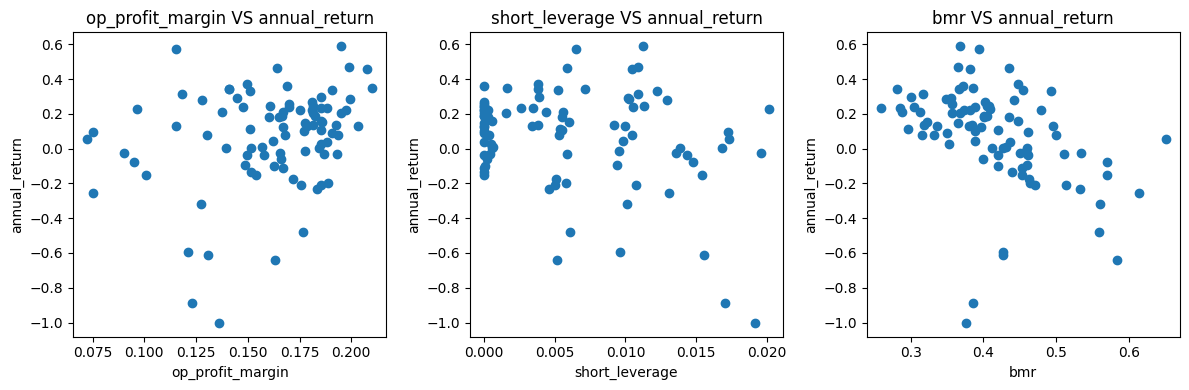

In [104]:
#Do plots to visualize the possible relationship each factor might have with the dependent variable.
fig, axs = plt.subplots(1, 3, figsize=(12,4))
df_finance_date = df_finance.copy()
df_finance_date = df_finance_date.dropna(subset=['op_profit_margin', 'short_leverage', 'bmr'])
df_finance_date = df_finance_date.groupby('date').median()

axs[0].scatter(df_finance_date['op_profit_margin'], df_finance_date['anual_cc_return'])
axs[0].set_title('op_profit_margin VS annual_return')
axs[0].set_ylabel('annual_return')
axs[0].set_xlabel('op_profit_margin')

axs[1].scatter(df_finance_date['short_leverage'], df_finance_date['anual_cc_return'])
axs[1].set_title('short_leverage VS annual_return')
axs[1].set_ylabel('annual_return')
axs[1].set_xlabel('short_leverage')

axs[2].scatter(df_finance_date['bmr'], df_finance_date['anual_cc_return'])
axs[2].set_title('bmr VS annual_return')
axs[2].set_ylabel('annual_return')
axs[2].set_xlabel('bmr')

fig.tight_layout()
plt.show()


FROM THE SCATTER CHART, WE CAN SEE  
OP_PROFIT_MARGIN MIGHT BE PROPTIONAL WITH ANNUAL RETURN  
SHORT LEVERAGE MIGHT NOT BE VERY SIGNIFICANT RELATED TO ANNUAL RETURN  
BMR MIGHT BE INVERSELY PROPOTIONAL TO ANNUAL RETURN

## ***Show descriptive statistics of these factors***


In [119]:
df_finance_win_alltime = df_finance.copy()
df_finance_win_alltime = df_finance_win_alltime.dropna(subset=['op_profit_margin', 'short_leverage', 'bmr'])
df_finance_win_alltime['op_profit_margin'] = winsorize(df_finance_win_alltime['op_profit_margin'], limits=[0.01,0.01])
df_finance_win_alltime['short_leverage'] = winsorize(df_finance_win_alltime['short_leverage'], limits=[0.01,0.01])
df_finance_win_alltime['bmr'] = winsorize(df_finance_win_alltime['bmr'], limits=[0.01,0.01])

In [120]:
#Show descriptive statistics of these factors
df_finance_win_alltime['op_profit_margin'].describe()

count    7768.000000
mean        0.127191
std         0.523404
min        -3.327397
25%         0.053446
50%         0.167300
75%         0.331245
max         0.958289
Name: op_profit_margin, dtype: float64

FOR ***OPERATIONAL PROFIT MARGIN***  
FOR ALL THE FIRM  
25% ALL THE TIME, IT IS BELOW 5.3%  
50% ALL THE TIME, IS IS BETWEEN 5.3% TO 33.1%  
25% ALL THE TIME, IS IS ABOVE 33.1%  
THE MEDIAN OF IT WILL BE 12.7%  
THE MEAN OF THE OP_PROFIT_MARGIN IS 12.7%, WITH STANDARD ERROR OF 52%

In [115]:
df_finance_win_alltime['short_leverage'].describe()

count    7768.000000
mean        0.044283
std         0.103529
min         0.000000
25%         0.000000
50%         0.004291
75%         0.033086
max         0.611525
Name: short_leverage, dtype: float64

FOR ***SHORT LEVERAGE***  
FOR ALL THE FIRM  
25% ALL THE TIME, IT IS 0% 
50% ALL THE TIME, IS IS BETWEEN 0% TO 3.3%  
25% ALL THE TIME, IS IS ABOVE 3.3%  
THE MEDIAN OF IT WILL BE 0.43%  
THE MEAN OF THE SHORT LEVERAGE IS 4.4%, WITH STANDARD ERROR OF 10.4%

In [116]:
df_finance_win_alltime['bmr'].describe()

count    7768.000000
mean        0.586900
std         0.684233
min        -0.149714
25%         0.205327
50%         0.400654
75%         0.694646
max         4.361542
Name: bmr, dtype: float64

FOR ***BOOK MARKET VALUE RATIO***  
FOR ALL THE FIRM  
25% ALL THE TIME, IT IS BELOW 0.2  
50% ALL THE TIME, IS IS BETWEEN 0.2 TO 0.7  
25% ALL THE TIME, IS IS ABOVE 0.7  
THE MEDIAN OF IT WILL BE 0.4 
THE MEAN OF THE BOOK MARKET VALUE RATIO IS 0.59, WITH STANDARD ERROR OF 0.68

# ***Design and run a multiple regression model***

## ***to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns.***  


In [230]:
df_finance_train = df_finance.copy()
df_finance_train = df_finance_train.dropna(subset=['op_profit_margin', 'short_leverage', 'bmr', 'epsp', 'anual_cc_return'])

### ***check for outliers and do the corresponding adjustments to avoid unreliable results in your regression model***
I DID A 1% WINSORIZATION OF BOTH EDGE FOR EACH INDIPENDENT VARIABLE

In [231]:
df_finance_train['op_profit_margin'] = winsorize(df_finance_train['op_profit_margin'], limits=[0.01,0.01])
df_finance_train['short_leverage'] = winsorize(df_finance_train['short_leverage'], limits=[0.01,0.01])
df_finance_train['bmr'] = winsorize(df_finance_train['bmr'], limits=[0.01,0.01])
df_finance_train['epsp'] = winsorize(df_finance_train['epsp'], limits=[0.01,0.01])

### ***You have to control for industry and firm size.***
WE ADDED DUMMY VARIABLE ***SIZE_D1*** AND ***SIZE_D2***,  
IN ORDER TO DIFFER THE MARKET VALUE OF EACH FIRM IN EACH DATE.  
SORT BY MARKET VALUE,  
1/3 OF THE LOWER FIRM WILL BE MARKED AS SIZE_D1 = 0 AND SIZE_D2 = 0  
1/3 OF THE MEDIA FIRM WILL BE MARKED AS SIZE_D1 = 1 AND SIZE_D2 = 0  
1/3 OF THE LARGE FIRM WILL BE MARKED AS SIZE_D1 = 0 AND SIZE_D2 = 1

In [232]:
df_finance_train['size_d1'] = 0
df_finance_train['size_d2'] = 0

In [233]:
df_finance_train_copy = df_finance_train.copy()
df_finance_train_date_size = df_finance_train_copy.sort_values(['date', 'marketvalue']).groupby('date')
df_finance_train_date_size[['marketvalue', 'date', 'q']].head()
#len(df_finance_train_date_size['date'].unique())
#df_finance_train_date_size['date'].head()

count = 0
for date in df_finance_train_copy['date'].unique():
    df_date = df_finance_train_copy.loc[df_finance_train_copy['date'] == date]
    
    size_total = df_date['marketvalue'].count()
    size_per = size_total // 3
    
    df_date_size_sort = df_date.sort_values('marketvalue')
    #df_date_size_sort.reset_index()
    #if(count == 0):
    #    print(df_date_size_sort[['size_d1', 'marketvalue']].head())
    #df_date_size_sort['size_d1'].iloc[size_per:(2 * size_per - 1)] = 1
    #df_date_size_sort['size_d2'].iloc[(2 * size_per) :] = 1

    for firm in df_date_size_sort['firm'].iloc[size_per:(2 * size_per - 1)]:
        df_finance_train_copy.loc[(df_finance_train_copy['firm'] == firm) & (df_finance_train_copy['date'] == date), 'size_d1'] = 1
        #if(count == 0):
        #    print(df_finance_train_copy[(df_finance_train_copy['firm'] == firm) & (df_finance_train_copy['date'] == date)].index.to_list()[0])

    for firm in df_date_size_sort['firm'].iloc[(2 * size_per) :]:
        df_finance_train_copy.loc[(df_finance_train_copy['firm'] == firm) & (df_finance_train_copy['date'] == date), 'size_d2'] = 1


    count += 1

#print(count)
#df_finance_train_copy.isna().sum()
#df_finance_train_copy[['date', 'marketvalue', 'size_d1', 'size_d2']].head(40)
#print(df_finance_train_copy['size_d1'].unique())
#print(df_finance_train_copy['size_d2'].unique())

In [220]:
#df_finance_train_copy[(df_finance_train_copy['size_d1'] == 0) & (df_finance_train_copy['size_d2'] == 0)][['date', 'marketvalue', 'size_d1', 'size_d2']].sort_values('date').tail(10)

In [219]:
#df_finance_train_copy[df_finance_train_copy['size_d1'] == 1][['date', 'marketvalue', 'size_d1', 'size_d2']].sort_values('date').tail(10)

In [218]:
#df_finance_train_copy[df_finance_train_copy['size_d2'] == 1][['date', 'marketvalue', 'size_d1', 'size_d2']].sort_values('date').tail(10)

### ***You must check for possible multicollinearity problems***
#### ***Briefly explain what is multicollinearity***
MULTICOLLINEARITY  IS WHEN ONE INDEPENDENT VARIABLE IS LINEARLY CORRELATED WITH ANOTHER INDEPENDENT VARIABLE, IN A REGRESSION MODEL

### ***run and interpret the corresponding test***

In [238]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_var = df_finance_train_copy[['op_profit_margin', 'short_leverage', 'bmr', 'epsp', 'size_d1', 'size_d2']]
vif_data = pd.DataFrame()
vif_data['feature'] = x_var.columns
vif_data['VIF'] = [variance_inflation_factor(x_var.values, i) for i in range(len(x_var.columns))]
vif_data

,feature,VIF
0,op_profit_margin,1.261511
1,short_leverage,1.172672
2,bmr,1.294085
3,epsp,1.203415
4,size_d1,1.237846
5,size_d2,1.200835


WE CALCULATE THE VIF (VARIANCE INFLATION FACTOR) FOR EACH INDEPENDENT VARAIBLE,  
IF THE VIF FOR THE VARIABLE IS BIGGER OR EQUAL TO 10, IT MEANS WE HAVE MULTICOLLIENARITY CAUSED BY THAT VARIABLE.  
IN OUR RESULT, WE SEE THE VIF OF ALL THE INDEPENDENT VARILABLE IS LOWER COLSE TO 1,   
IT MEANS THERE IS NO MULTICOLLIENARITY BETWEEN OUR INDEPENDENT VARIABLES.  

In [247]:
#df_finance[['firm', 'q', 'anual_cc_return']].head(100)

### ***Run the Regression***

In [239]:
import statsmodels.api as sm
X = df_finance_train_copy[['op_profit_margin', 'short_leverage', 'bmr', 'epsp', 'size_d1', 'size_d2']]
y = df_finance_train_copy['anual_cc_return']

X = sm.add_constant(X)
mkmodel = sm.OLS(y,X).fit()
mkmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        anual_cc_return   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     159.4
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          5.69e-191
Time:                        02:59:10   Log-Likelihood:                -5247.5
No. Observations:                7357   AIC:                         1.051e+04
Df Residuals:                    7350   BIC:                         1.056e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1398      0.012     11.409      0.000       0.116       0.164
op_profit_margin     0.0319      0.012      2.604      0.009       0.008       0.056
short_leverage      -0.2119      0.058     -3.643      0.000      -0.326      -0.098
bmr                 -0.1553      0.009    -17.684      0.000      -0.172      -0.138
epsp                 2.3144      0.132     17.589      0.000       2.057       2.572
size_d1              0.0248      0.015      1.706      0.088      -0.004       0.053
size_d2              0.0469      0.015      3.221      0.001       0.018       0.075
==============================================================================
Omnibus:                     1718.915   Durbin-Watson:                   0.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40392.858
Skew:                          -0.556   Prob(JB):                         0.00
Kurtosis:                      14.425   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ***Interpret your model***  
### ***Interpret the results of each coefficient (beta and their statistical significance)***  
***B_CONST***  
THE T VALUE OF THIS BETA IS 11.409, THE P VALUE OF THIS BETA IS LESS THAN 0.0000001,  
SO IT IS VERY CONFIDENT, AND LESS THAN 0.0000001 OF THE CHANGE IT WILL BE LESS THAN 0,  
95% OF THE CHANGE, IT WILL BE BETWEEN 0.116 AND 0.164  
SO IT IS STATISTICAL SIGNIFICANT.  
***B_OP_PROFIT_MARGIN***  
THE T VALUE OF THIS BETA IS 2.604, THE P VALUE OF THIS BETA IS 0.9%,  
SO IT IS CONFIDENT, AND LESS THAN 0.9% OF THE CHANGE IT WILL BE LESS THAN 0,  
95% OF THE CHANGE, IT WILL BE BETWEEN 0.008 AND 0.056  
SO IT IS STATISTICAL SIGNIFICANT.  
***B_SHORT_LEVERAGE***  
THE T VALUE OF THIS BETA IS 3.643, THE P VALUE OF THIS BETA IS < 0.0001,  
SO IT IS VERY CONFIDENT, AND LESS THAN 0.0001 OF THE CHANGE IT WILL BE BIGGER THAN 0,  
95% OF THE CHANGE, IT WILL BE BETWEEN -0.326 AND -0.098  
SO IT IS STATISTICAL SIGNIFICANT.      
***B_BMR***  
THE T VALUE OF THIS BETA IS 17.684, THE P VALUE OF THIS BETA IS < 0.000001,  
SO IT IS VERY CONFIDENT, AND LESS THAN 0.000001 OF THE CHANGE IT WILL BE BIGGER THAN 0,  
95% OF THE CHANGE, IT WILL BE BETWEEN -0.172 AND -0.138  
SO IT IS STATISTICAL SIGNIFICANT.   
***B_EPSP***  
THE T VALUE OF THIS BETA IS 17.589, THE P VALUE OF THIS BETA IS < 0.000001,  
SO IT IS VERY CONFIDENT, AND LESS THAN 0.000001 OF THE CHANGE IT WILL BE SMALLER THAN 0,  
95% OF THE CHANGE, IT WILL BE BETWEEN 2.057 AND 2.572  
SO IT IS STATISTICAL SIGNIFICANT.  
***B_SIZE_D1***  
THE T VALUE OF THIS BETA IS 1.706, THE P VALUE OF THIS BETA IS 8.8%,  
SO IT IS ***NOT*** CONFIDENT, AND 8.8% OF THE CHANGE IT WILL BE SMALLER THAN 0,  
95% OF THE CHANGE, IT WILL BE BETWEEN -0.004 AND 0.053  
SO IT IS ***NOT*** STATISTICAL SIGNIFICANT.  
***B_SIZE_D2***  
THE T VALUE OF THIS BETA IS 3.221, THE P VALUE OF THIS BETA IS 0.1%,  
SO IT IS VERY CONFIDENT, AND LESS THAN 0.1% OF THE CHANGE IT WILL BE SMALLER THAN 0,  
95% OF THE CHANGE, IT WILL BE BETWEEN 0.018 AND 0.075  
SO IT IS STATISTICAL SIGNIFICANT.  

### ***Interpret the R-squared of the model***
R-SQUARED DETERMINES HOW WELL THE DATA FIT THE REGRESSSION MODEL.  
R-SQUARED IS 0.115, 11.5%.  
IT MEANS 11.5% OF THE VARIABILITY OBSERVED IN THE TARGET VARIABLE IS EXPLAINED BY THE REGRESSION MODEL.  
IT MEANS 11.5% OF THE CHANCE, OUR ANNUAL RETURN CAN BE PRESENTED BY OUR REGRESSION MODEL,  
AND 88.5% CHANCE, OUR REGRESSION MODEL WILL NOT REPESENT THE ANNUAL RETURN.  
ACTUALLY OUR MODEL IS NOT VERY GOOD FOR PREDICTION.  

### ***Adjustments to your model.***

SINCE THE B_SIZE_D1 IS NOT STATISTICAL SIGNIFICANT,  
SO WE WILL DROP THE SIZE_D1,  
AND REDO THE REGRESSION 

In [ ]:
X2 = df_finance_train_copy[['op_profit_margin', 'short_leverage', 'bmr', 'epsp', 'size_d2']]
y2 = df_finance_train_copy['anual_cc_return']

X2 = sm.add_constant(X2)
mkmodel2 = sm.OLS(y2,X2).fit()
mkmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        anual_cc_return   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     190.6
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          1.67e-191
Time:                        03:02:26   Log-Likelihood:                -5249.0
No. Observations:                7357   AIC:                         1.051e+04
Df Residuals:                    7351   BIC:                         1.055e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1528      0.010     15.951      0.000       0.134       0.172
op_profit_margin     0.0332      0.012      2.720      0.007       0.009       0.057
short_leverage      -0.2053      0.058     -3.536      0.000      -0.319      -0.091
bmr                 -0.1576      0.009    -18.157      0.000      -0.175      -0.141
epsp                 2.3328      0.131     17.786      0.000       2.076       2.590
size_d2              0.0341      0.012      2.732      0.006       0.010       0.059
==============================================================================
Omnibus:                     1733.887   Durbin-Watson:                   0.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40458.566
Skew:                          -0.570   Prob(JB):                         0.00
Kurtosis:                      14.432   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ***You have to run and interpret your final model.***
***B_CONST***  
THE T VALUE OF THIS BETA IS 11.409, THE P VALUE OF THIS BETA IS LESS THAN 0.0000001,  
SO IT IS VERY CONFIDENT, AND LESS THAN 0.0000001 OF THE CHANGE IT WILL BE LESS THAN 0,  
95% OF THE CHANGE, IT WILL BE BETWEEN 0.116 AND 0.164  
SO IT IS STATISTICAL SIGNIFICANT.  
***B_OP_PROFIT_MARGIN***  
THE T VALUE OF THIS BETA IS 2.604, THE P VALUE OF THIS BETA IS 0.9%,  
SO IT IS CONFIDENT, AND LESS THAN 0.9% OF THE CHANGE IT WILL BE LESS THAN 0,  
95% OF THE CHANGE, IT WILL BE BETWEEN 0.008 AND 0.056  
SO IT IS STATISTICAL SIGNIFICANT.  
***B_SHORT_LEVERAGE***  
THE T VALUE OF THIS BETA IS 3.643, THE P VALUE OF THIS BETA IS < 0.0001,  
SO IT IS VERY CONFIDENT, AND LESS THAN 0.0001 OF THE CHANGE IT WILL BE BIGGER THAN 0,  
95% OF THE CHANGE, IT WILL BE BETWEEN -0.326 AND -0.098  
SO IT IS STATISTICAL SIGNIFICANT.      
***B_BMR***  
THE T VALUE OF THIS BETA IS 17.684, THE P VALUE OF THIS BETA IS < 0.000001,  
SO IT IS VERY CONFIDENT, AND LESS THAN 0.000001 OF THE CHANGE IT WILL BE BIGGER THAN 0,  
95% OF THE CHANGE, IT WILL BE BETWEEN -0.172 AND -0.138  
SO IT IS STATISTICAL SIGNIFICANT.   
***B_EPSP***  
THE T VALUE OF THIS BETA IS 17.589, THE P VALUE OF THIS BETA IS < 0.000001,  
SO IT IS VERY CONFIDENT, AND LESS THAN 0.000001 OF THE CHANGE IT WILL BE SMALLER THAN 0,  
95% OF THE CHANGE, IT WILL BE BETWEEN 2.057 AND 2.572  
SO IT IS STATISTICAL SIGNIFICANT.  
***B_SIZE_D2***  
THE T VALUE OF THIS BETA IS 3.221, THE P VALUE OF THIS BETA IS 0.1%,  
SO IT IS VERY CONFIDENT, AND LESS THAN 0.1% OF THE CHANGE IT WILL BE SMALLER THAN 0,  
95% OF THE CHANGE, IT WILL BE BETWEEN 0.018 AND 0.075  
SO IT IS STATISTICAL SIGNIFICANT.  